---
# Cairo University Faculty of Engineering
## Machine Learning
## Assignment 5

---

Please write your full name here
- **Name** : "Mourad Magdy"

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Part 1 Decision Tree


In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42, criterion='entropy')
tree_clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

## Q1 Plot decision tree using export_graphviz

---



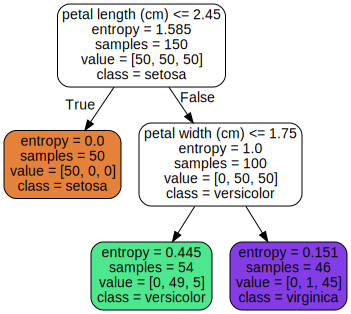

In [ ]:
# Answer:

from graphviz import Source
from sklearn.tree import export_graphviz

dot=export_graphviz(tree_clf,out_file=None,class_names=iris.target_names,feature_names=iris.feature_names[2:],rounded=True,filled=True)
graph=Source(dot)
graph


## Q2 Plotting decision boundaries

Use the following function to plot the decision boundaries of DT from Q1

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, -3, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

Plotting for max_depth = 2

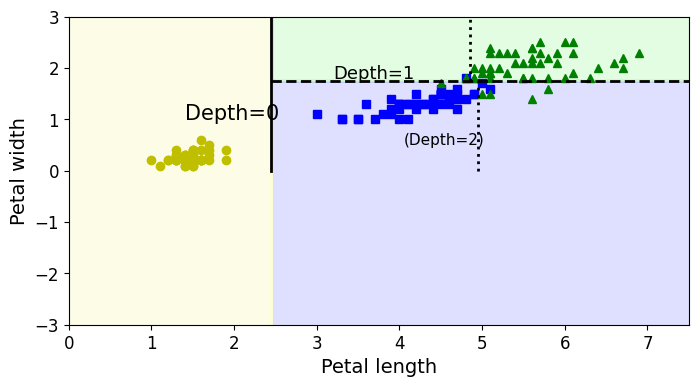

In [ ]:
plt.figure(figsize=(8, 4))

plot_decision_boundary(tree_clf, X, y)

plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)
plt.show()

### Q2.1
- Train the decision tree using a maximum depth of 1.
- Plot the decision tree using graphviz
- Use the above function to plot the decision boundaries

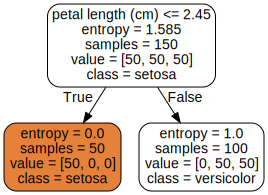

In [ ]:
tree_clf=DecisionTreeClassifier(max_depth=1,random_state=42,criterion='entropy')
tree_clf.fit(X,y)

dot=export_graphviz(tree_clf,class_names=iris.target_names,feature_names=iris.feature_names[2:],rounded=True,filled=True)
graph=Source(dot)
graph





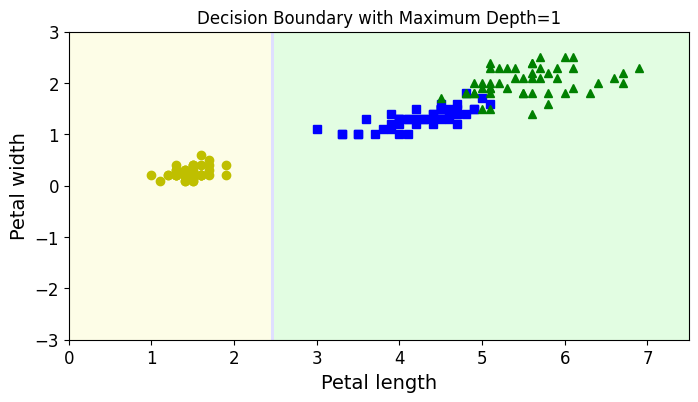

In [ ]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Boundary with Maximum Depth=1")
plt.show()



**Question**
1. After plotting the resulting tree.
    - What's the output entropy in each block?
    - Comment on the entropy values in each block.
2. What's the difference in decision trees between using max_depth = 1, max_depth = 2, max_depth = 10? *Hint: Plot the tree in each case*

**Answer**

1. entropy in the parent node is 1.585
entropy in the left child is 0
entropy in right child is 1

- entropy of zero means that it is pure and all the training instances belong to the same class
- entropy of 1 means that it is impure and the data si uniformly distributed meaning there is equal probabilty for each class.

2.
depth 1: it is a very simple tree which represents only one class not all the classes
- depth 2:it represens the three classes but not with high accuracy as there are two classes which relativly high entropy
- depth 10: it almost represents all the classes, it is very complex tree and it might overfit the data

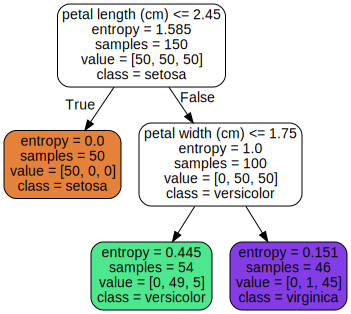

In [ ]:

tree_clf=DecisionTreeClassifier(max_depth=2,random_state=42,criterion='entropy')
tree_clf.fit(X,y)

dot=export_graphviz(tree_clf,class_names=iris.target_names,feature_names=iris.feature_names[2:],rounded=True,filled=True)
graph=Source(dot)
graph

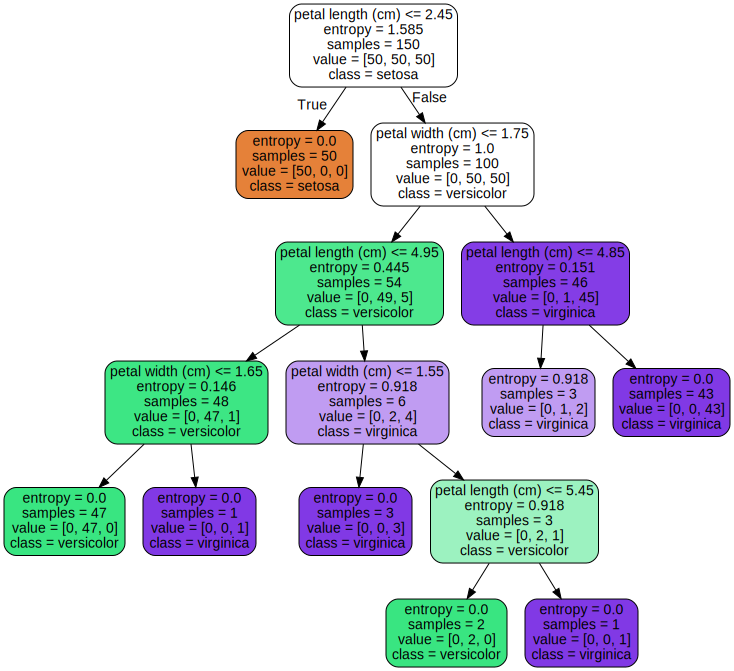

In [ ]:

tree_clf=DecisionTreeClassifier(max_depth=10,random_state=42,criterion='entropy')
tree_clf.fit(X,y)

dot=export_graphviz(tree_clf,class_names=iris.target_names,feature_names=iris.feature_names[2:],rounded=True,filled=True)
graph=Source(dot)
graph

### Q2.2

**Question**
1. Calculate probabilities of all classes on this data point X = [[5, 1.5]] using decision tree with max_depth = 2
2. Compare your result with "predict_proba" function.

**Answer**
1.

In [ ]:
######### Your code for (2.)
import numpy as np
x=[[5,1.5]]
tree_clf=DecisionTreeClassifier(max_depth=2,random_state=42,criterion='entropy')
tree_clf.fit(X,y)
predict_class=tree_clf.predict(x)[0]
leaf_nodes=tree_clf.apply(x)
leaf_nodes_classes=np.bincount(y[np.where(tree_clf.apply(X)==leaf_nodes)])
probabilty=leaf_nodes_classes/np.sum(leaf_nodes_classes)
print("Probabilites of classes : ",probabilty)

proba=tree_clf.predict_proba(x)
print("Probabilties using proba function : ",proba)

Probabilites of classes :  [0.         0.90740741 0.09259259]
Probabilties using proba function :  [[0.         0.90740741 0.09259259]]


## Question 3 Sensitivity to data

### Q3.1 Decision Tree
**Question**
1. Fit a decision tree classifier max_depth = 2, to the original data
2. Plot the resulting decision boundaries
3. Print the clasifier score on training data

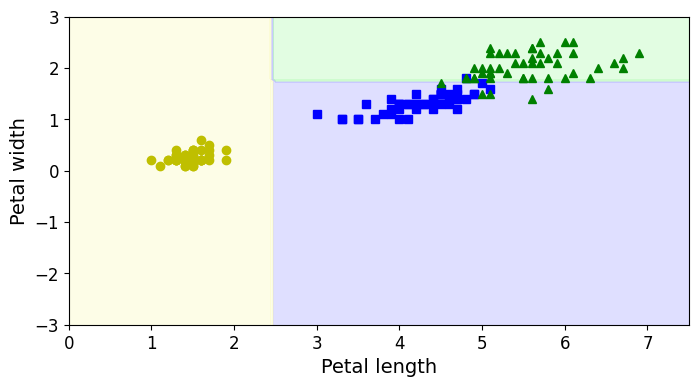

The score on the training data is:  96.0


In [ ]:
##### YOUR CODE HERE
tree_clf=DecisionTreeClassifier(max_depth=2,random_state=42,criterion='entropy')
tree_clf.fit(X,y)
plt.figure(figsize=(8, 4))

plot_decision_boundary(tree_clf, X, y)


plt.show()
score=tree_clf.score(X,y)
print("The score on the training data is: ",score*100)


The following cell rotates the data by angle **30**

In [ ]:
angle = np.pi / 180 * 30
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xr = X.dot(rotation_matrix)

**Question**
1. Fit another decision tree classifier max_depth = 2, to the rotated data
2. Plot the resulting decision boundaries
3. Print the clasifier score on training data

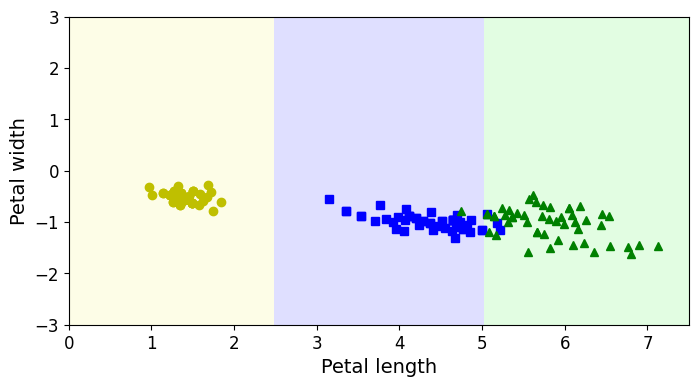

The score on the training data is:  97.33333333333334


In [ ]:
##### YOUR CODE HERE
tree_clf=DecisionTreeClassifier(max_depth=2,random_state=42,criterion='entropy')
tree_clf.fit(Xr,y)
plt.figure(figsize=(8, 4))

plot_decision_boundary(tree_clf, Xr, y)


plt.show()
score=tree_clf.score(Xr,y)
print("The score on the training data is: ",score*100)


### Q3.2 Logistic Regression
The following function plots the decision boundaries for a logistic regression classifier

In [ ]:
import numpy as np
def plot_logistic_regression(clf, X, y, axes, iris=True):

  x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
  y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
  h = 0.02  # step size in the mesh
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

  plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
  plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
  plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")

  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
  else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
  plt.legend(loc="lower right", fontsize=14)
  plt.show()

**Question**

1. Fit a logistic regression classifier to the original data
2. Plot the resulting decision boundaries
3. Print the clasifier score on training data

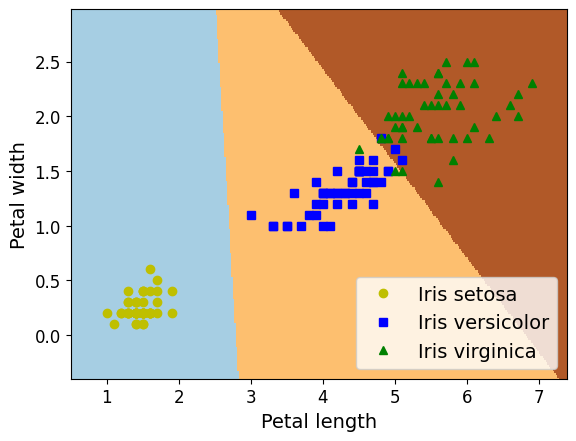

The score is :  0.9666666666666667


In [ ]:
##### YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression(random_state=42,solver='lbfgs')
logistic_clf=logistic.fit(X,y)
plot_logistic_regression(logistic_clf,X,y,axes=[0, 7.5, 0, 3],iris=True)
score=logistic_clf.score(X,y)
print("The score is : ",score)




**Question**
1. Fit another logistic regression classifier to the rotated data
2. Plot the resulting decision boundaries
3. Print the clasifier score on training data

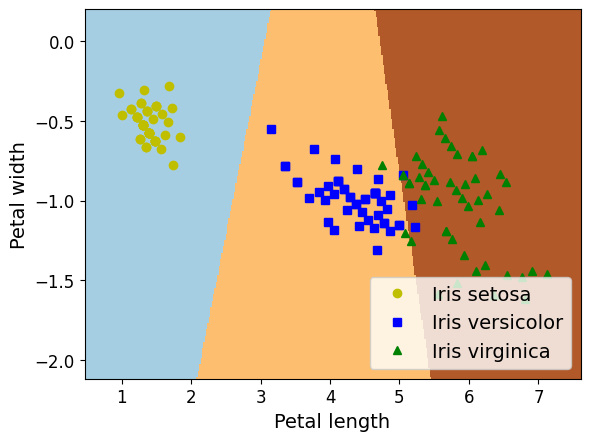

The score is :  0.9666666666666667


In [ ]:
###### YOUR CODE HERE
logistic_clf=logistic.fit(Xr,y)
plot_logistic_regression(logistic_clf,Xr,y,axes=[0, 7.5, 0, 3],iris=True)
score=logistic_clf.score(Xr,y)
print("The score is : ",score)

### Q3.3
1. Comment on the differences between the logistic regression and decision trees classifiers scores to the original and rotated data
2. Explain why that happened?

**Answer**

1. the accuracy of the decision tree increased while the logistic regession remains the same

2. it can be observed that the data is lineary separable so the rotation won't affect the logistic regression, while decision trees uses axes to split the the data so rotation might affect them

## Question 4 GridSearch

1. Generate a moons dataset using `make_moons(n_samples=10000, noise=0.35)`.

In [ ]:
from sklearn.datasets import make_moons
X_moons,y_moons=make_moons(n_samples=10000,noise=0.35,random_state=42)

2. Split it into a training set and a test set using train_test_split().

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_moons,y_moons,test_size=0.2,random_state=42)




3. Use grid search with cross-validation (with the help of the GridSearchCV class) to find best hyperparameter (max_depth, max_leaf_nodes, min_samples_split) values for a DecisionTreeClassifier.
    - Choose reasonable values for each hyperparameter.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid={
    'max_depth':[2,3,5,7,10,20],
    'max_leaf_nodes':[None,5,10,20],
    'min_samples_split':[2,5,10]
}

grid_search=GridSearchCV(tree_clf,param_grid,cv=5,scoring='accuracy',return_train_score=True)

grid_search.fit(X_train,y_train)
best_param=grid_search.best_params_
print("best parameters: ",best_param)


best parameters:  {'max_depth': 7, 'max_leaf_nodes': None, 'min_samples_split': 5}


4. Train it on the full training set using the best hyperparameters, and measure your model's performance on the test set.

In [ ]:
from sklearn.metrics import accuracy_score
best_max_depth=best_param['max_depth']
best_max_leaf_nodes=best_param['max_leaf_nodes']
best_min_samples_split=best_param['min_samples_split']
tree_clf=DecisionTreeClassifier(random_state=42,max_depth=best_max_depth,max_leaf_nodes=best_max_leaf_nodes,min_samples_split=best_min_samples_split)
tree_clf.fit(X_train,y_train)
y_pred=tree_clf.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)

print("accuracy is : ",accuracy*100)



accuracy is :  88.5


## Question 4 Regression Tree

### Question
For the following plot of the two decision tree regressors:
1. Comment on the results
2. Which model has a higher variance error? why?
3. Which model has a higher bias error? why?

**Answer**

1. model with depth 5 appears to overfit the data, while the one with depth 2 appears to fit the data but not very well.
2. model with depth 5 has high variance as it tends to overfit the data and capture noise so it will perform bad on testing data
3. model with depth 2 has higher bias error as it simplifies assumptions made by the model, it may not capture the complexity of the data accuratly

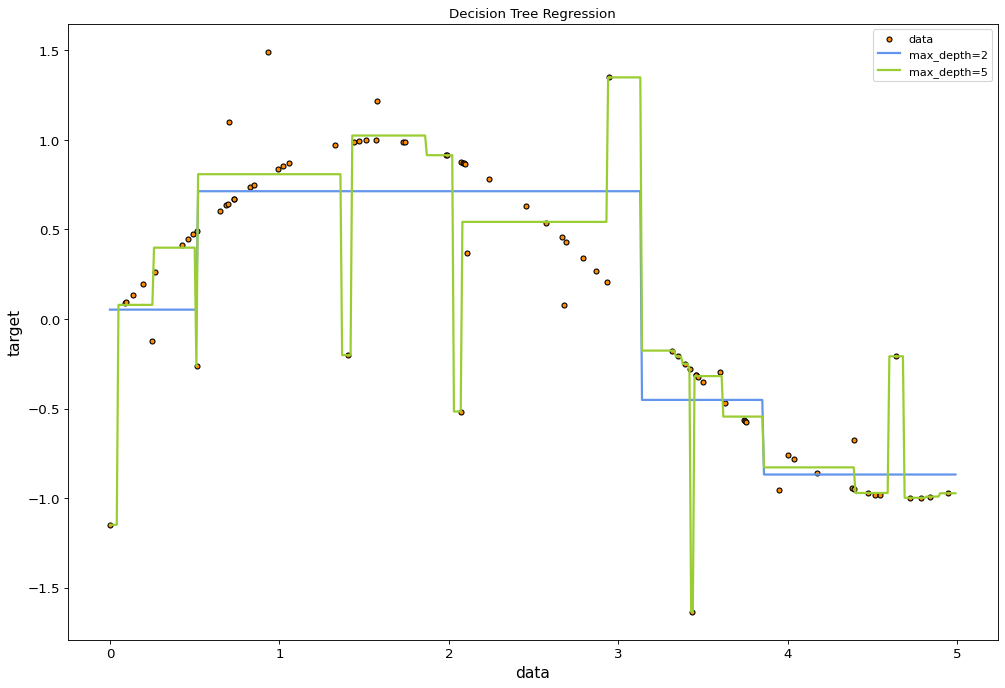

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure(figsize=(15,10),dpi=80)
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()